# Importing all the necessary libraries

In [98]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plot
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# reading the data from the dataset into a dataframe

In [99]:
data=pd.read_csv('dataset\heart.csv')
data.columns=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Data Exploration

In [100]:
data.shape

(303, 14)

In [101]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [102]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
num           int64
dtype: object

In [103]:
data.values

array([[63.,  1.,  3., ...,  0.,  1.,  1.],
       [37.,  1.,  2., ...,  0.,  2.,  1.],
       [41.,  0.,  1., ...,  0.,  2.,  1.],
       ...,
       [68.,  1.,  0., ...,  2.,  3.,  0.],
       [57.,  1.,  0., ...,  1.,  3.,  0.],
       [57.,  0.,  1., ...,  1.,  2.,  0.]])

In [104]:
data.info

<bound method DataFrame.info of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  num  
0        0   0     1    1  

In [105]:
data.index

RangeIndex(start=0, stop=303, step=1)

In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  num       303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [107]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [108]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [109]:
data.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
269,56,1,0,130,283,1,0,103,1,1.6,0,0,3,0
156,47,1,2,130,253,0,1,179,0,0.0,2,0,2,1
207,60,0,0,150,258,0,0,157,0,2.6,1,2,3,0
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2,1
79,58,1,2,105,240,0,0,154,1,0.6,1,0,3,1
286,59,1,3,134,204,0,1,162,0,0.8,2,2,2,0
247,66,1,1,160,246,0,1,120,1,0.0,1,3,1,0
240,70,1,2,160,269,0,1,112,1,2.9,1,1,3,0
271,61,1,3,134,234,0,1,145,0,2.6,1,2,2,0


In [110]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Missing Values

In [111]:
data.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [112]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [113]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
num           int64
dtype: object

# Deleting unknown chararcter records from the dataframe

In [114]:
#data[data['thal']=='?']
#data.drop(index=[86,265], inplace=True)

#data[data['ca']=='?']
#data.drop(index=[165,191,286, 301], inplace=True)

#data.reset_index=True

In [115]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
num           int64
dtype: object

# EDA for outliers detection

In [116]:
#The "goal" field refers to the presence of heart disease in the patient.  It is integer valued from 0 (no presence) to 4.
#data['num']=
#data.loc[data["num"] == 2, "num"] = 1
#data.loc[data["num"] == 4, "num"] = 3
data.num.value_counts()


1    165
0    138
Name: num, dtype: int64

<Axes: xlabel='num', ylabel='count'>

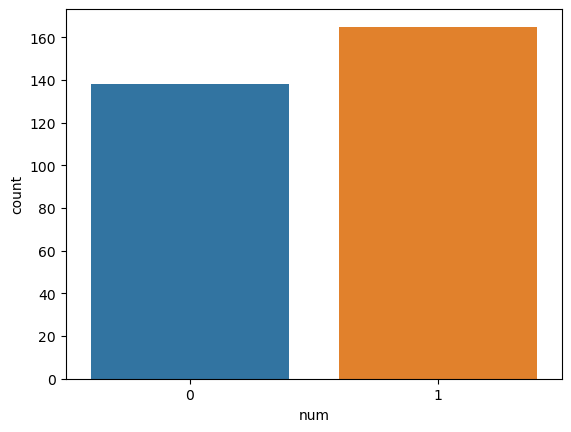

In [117]:
sns.countplot(data=data, x="num")

In [118]:
#finding the distribution in percentage
total_points=data.shape[0]
has_disease=len(data[data['num']!=0]['num'])
doesnot_have_disease=len(data[data['num']==0]['num'])
percentage_have_disease=(has_disease/total_points)*100
percentage_nothave_disease=(doesnot_have_disease/total_points)*100
print('Percentage of Patients having heart disease', round(percentage_have_disease),'%')
print('Percentage of Patients not having heart disease', round(percentage_nothave_disease),'%')

Percentage of Patients having heart disease 54 %
Percentage of Patients not having heart disease 46 %


Text(0.5, 0, 'Sex (0 = Female, 1 = Male)')

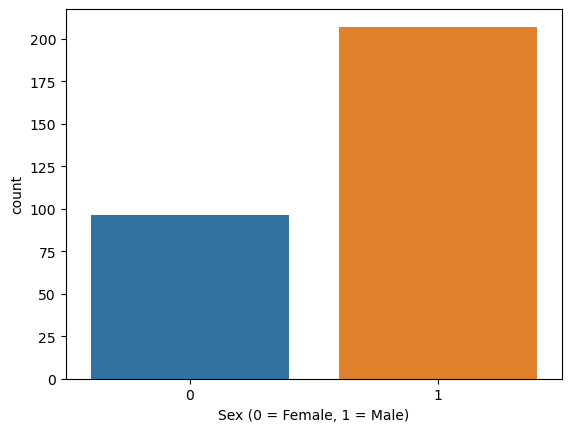

In [119]:
sns.countplot(x='sex', data=data)
plt.xlabel('Sex (0 = Female, 1 = Male)')

In [120]:
countfemale=len(data[data['sex']==0]['sex'])
countmale=len(data[data['sex']==1]['sex'])
femalepercent=(countfemale/total_points)*100
malepercent=(countmale/total_points)*100
print("Percentage of Female Patients:", round(femalepercent))
print("Percentage of Male Patients:", round(malepercent))

Percentage of Female Patients: 32
Percentage of Male Patients: 68


In [121]:
data.groupby(['num']).mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
num,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


Text(0, 0.5, 'Frequency')

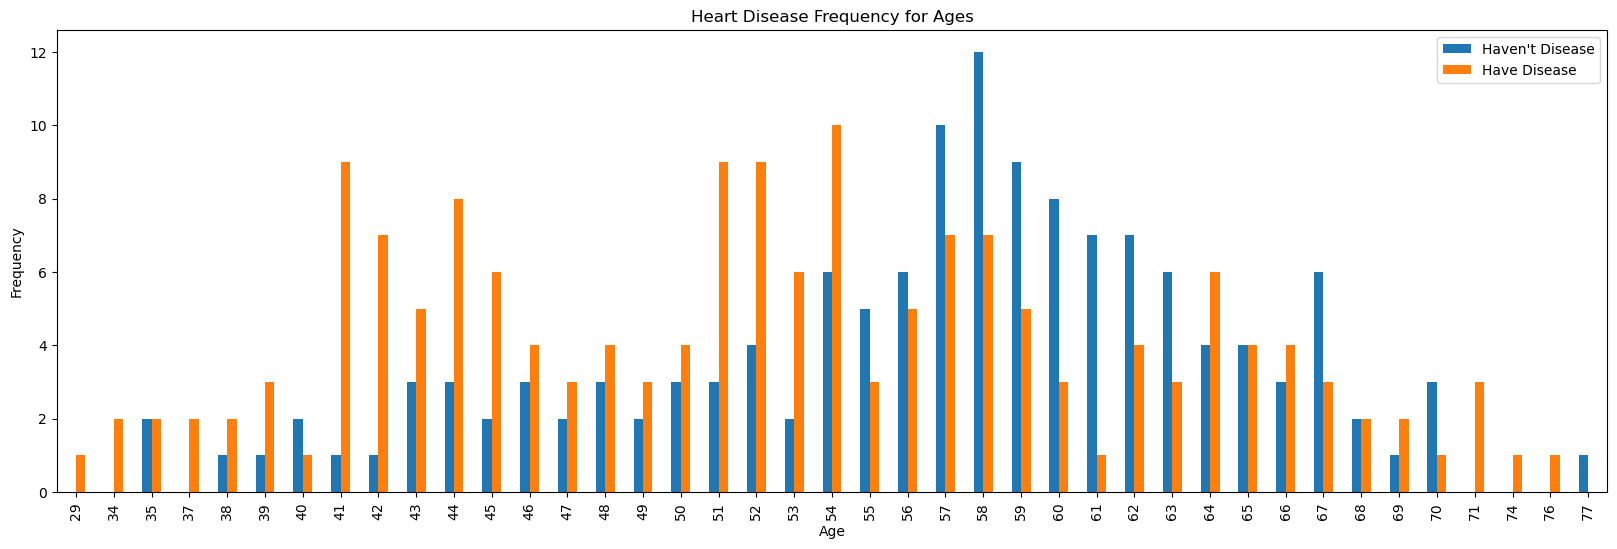

In [122]:
#method is used to compute a simple cross-tabulation of two (or more) factors. By default, computes a frequenc

pd.crosstab(data.age, data.num).plot(kind='bar',figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')

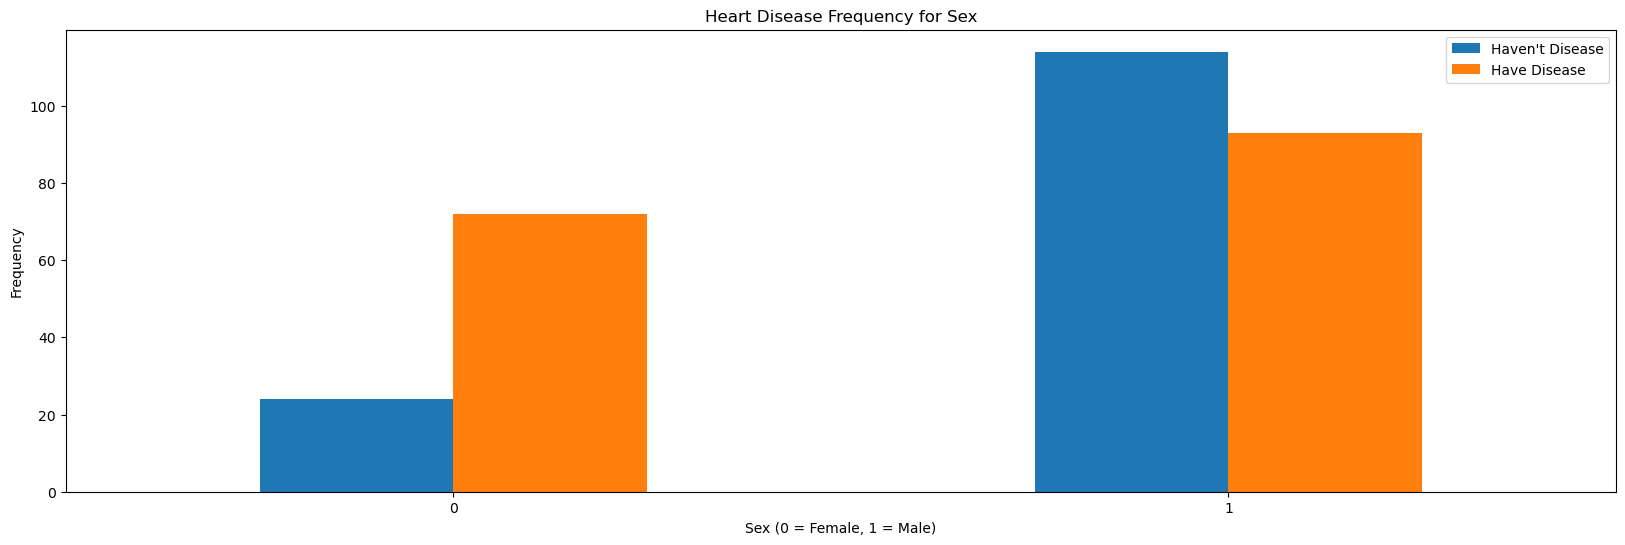

In [123]:
pd.crosstab(data.sex,data.num).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

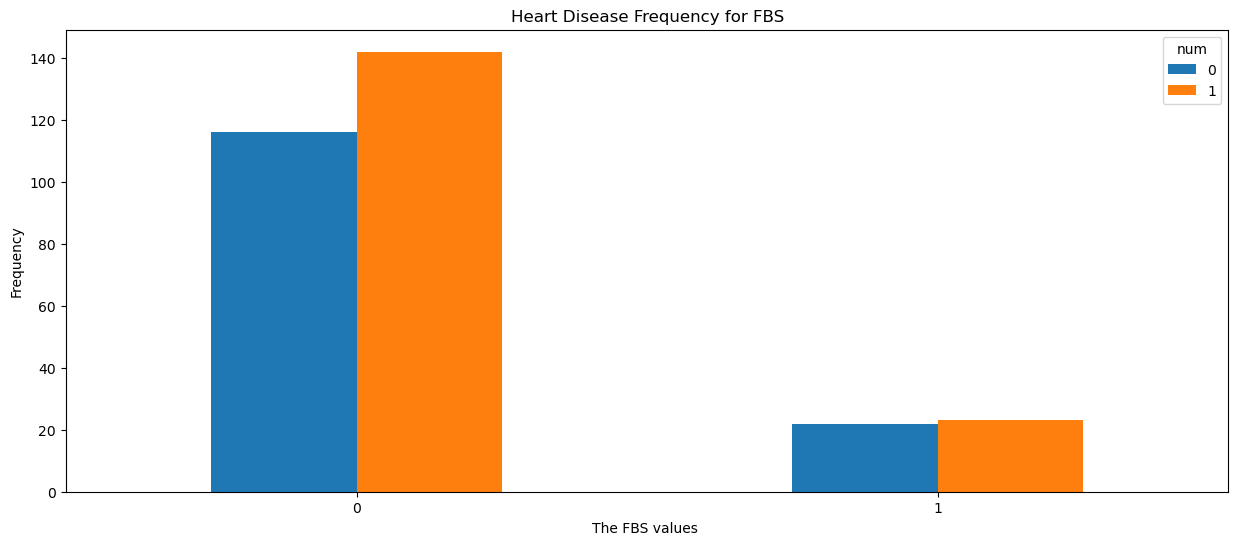

In [124]:
pd.crosstab(data.fbs,data.num).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency for FBS')
plt.xlabel('The FBS values ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

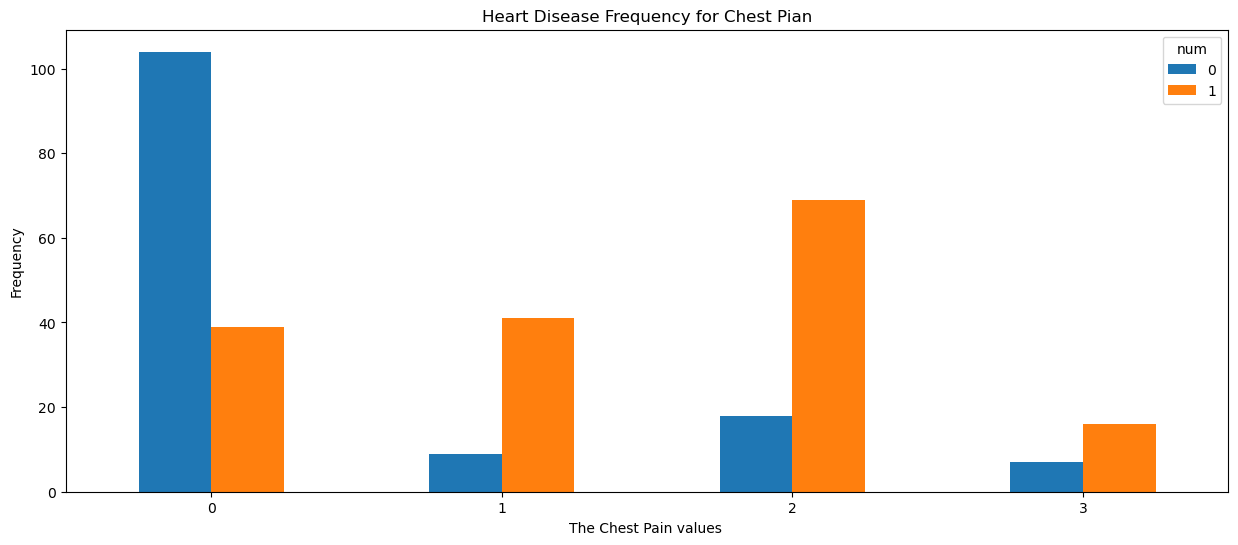

In [125]:
pd.crosstab(data.cp,data.num).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency for Chest Pian')
plt.xlabel('The Chest Pain values ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

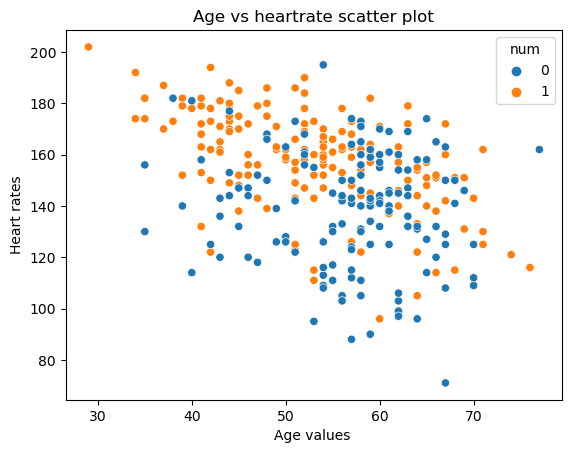

In [126]:
sns.scatterplot(data=data, hue='num', x='age', y='thalach')
plt.title('Age vs heartrate scatter plot')
plt.xlabel('Age values ')
plt.xticks(rotation = 0)
plt.ylabel('Heart rates')
plt.show()

# colinearity

<Axes: >

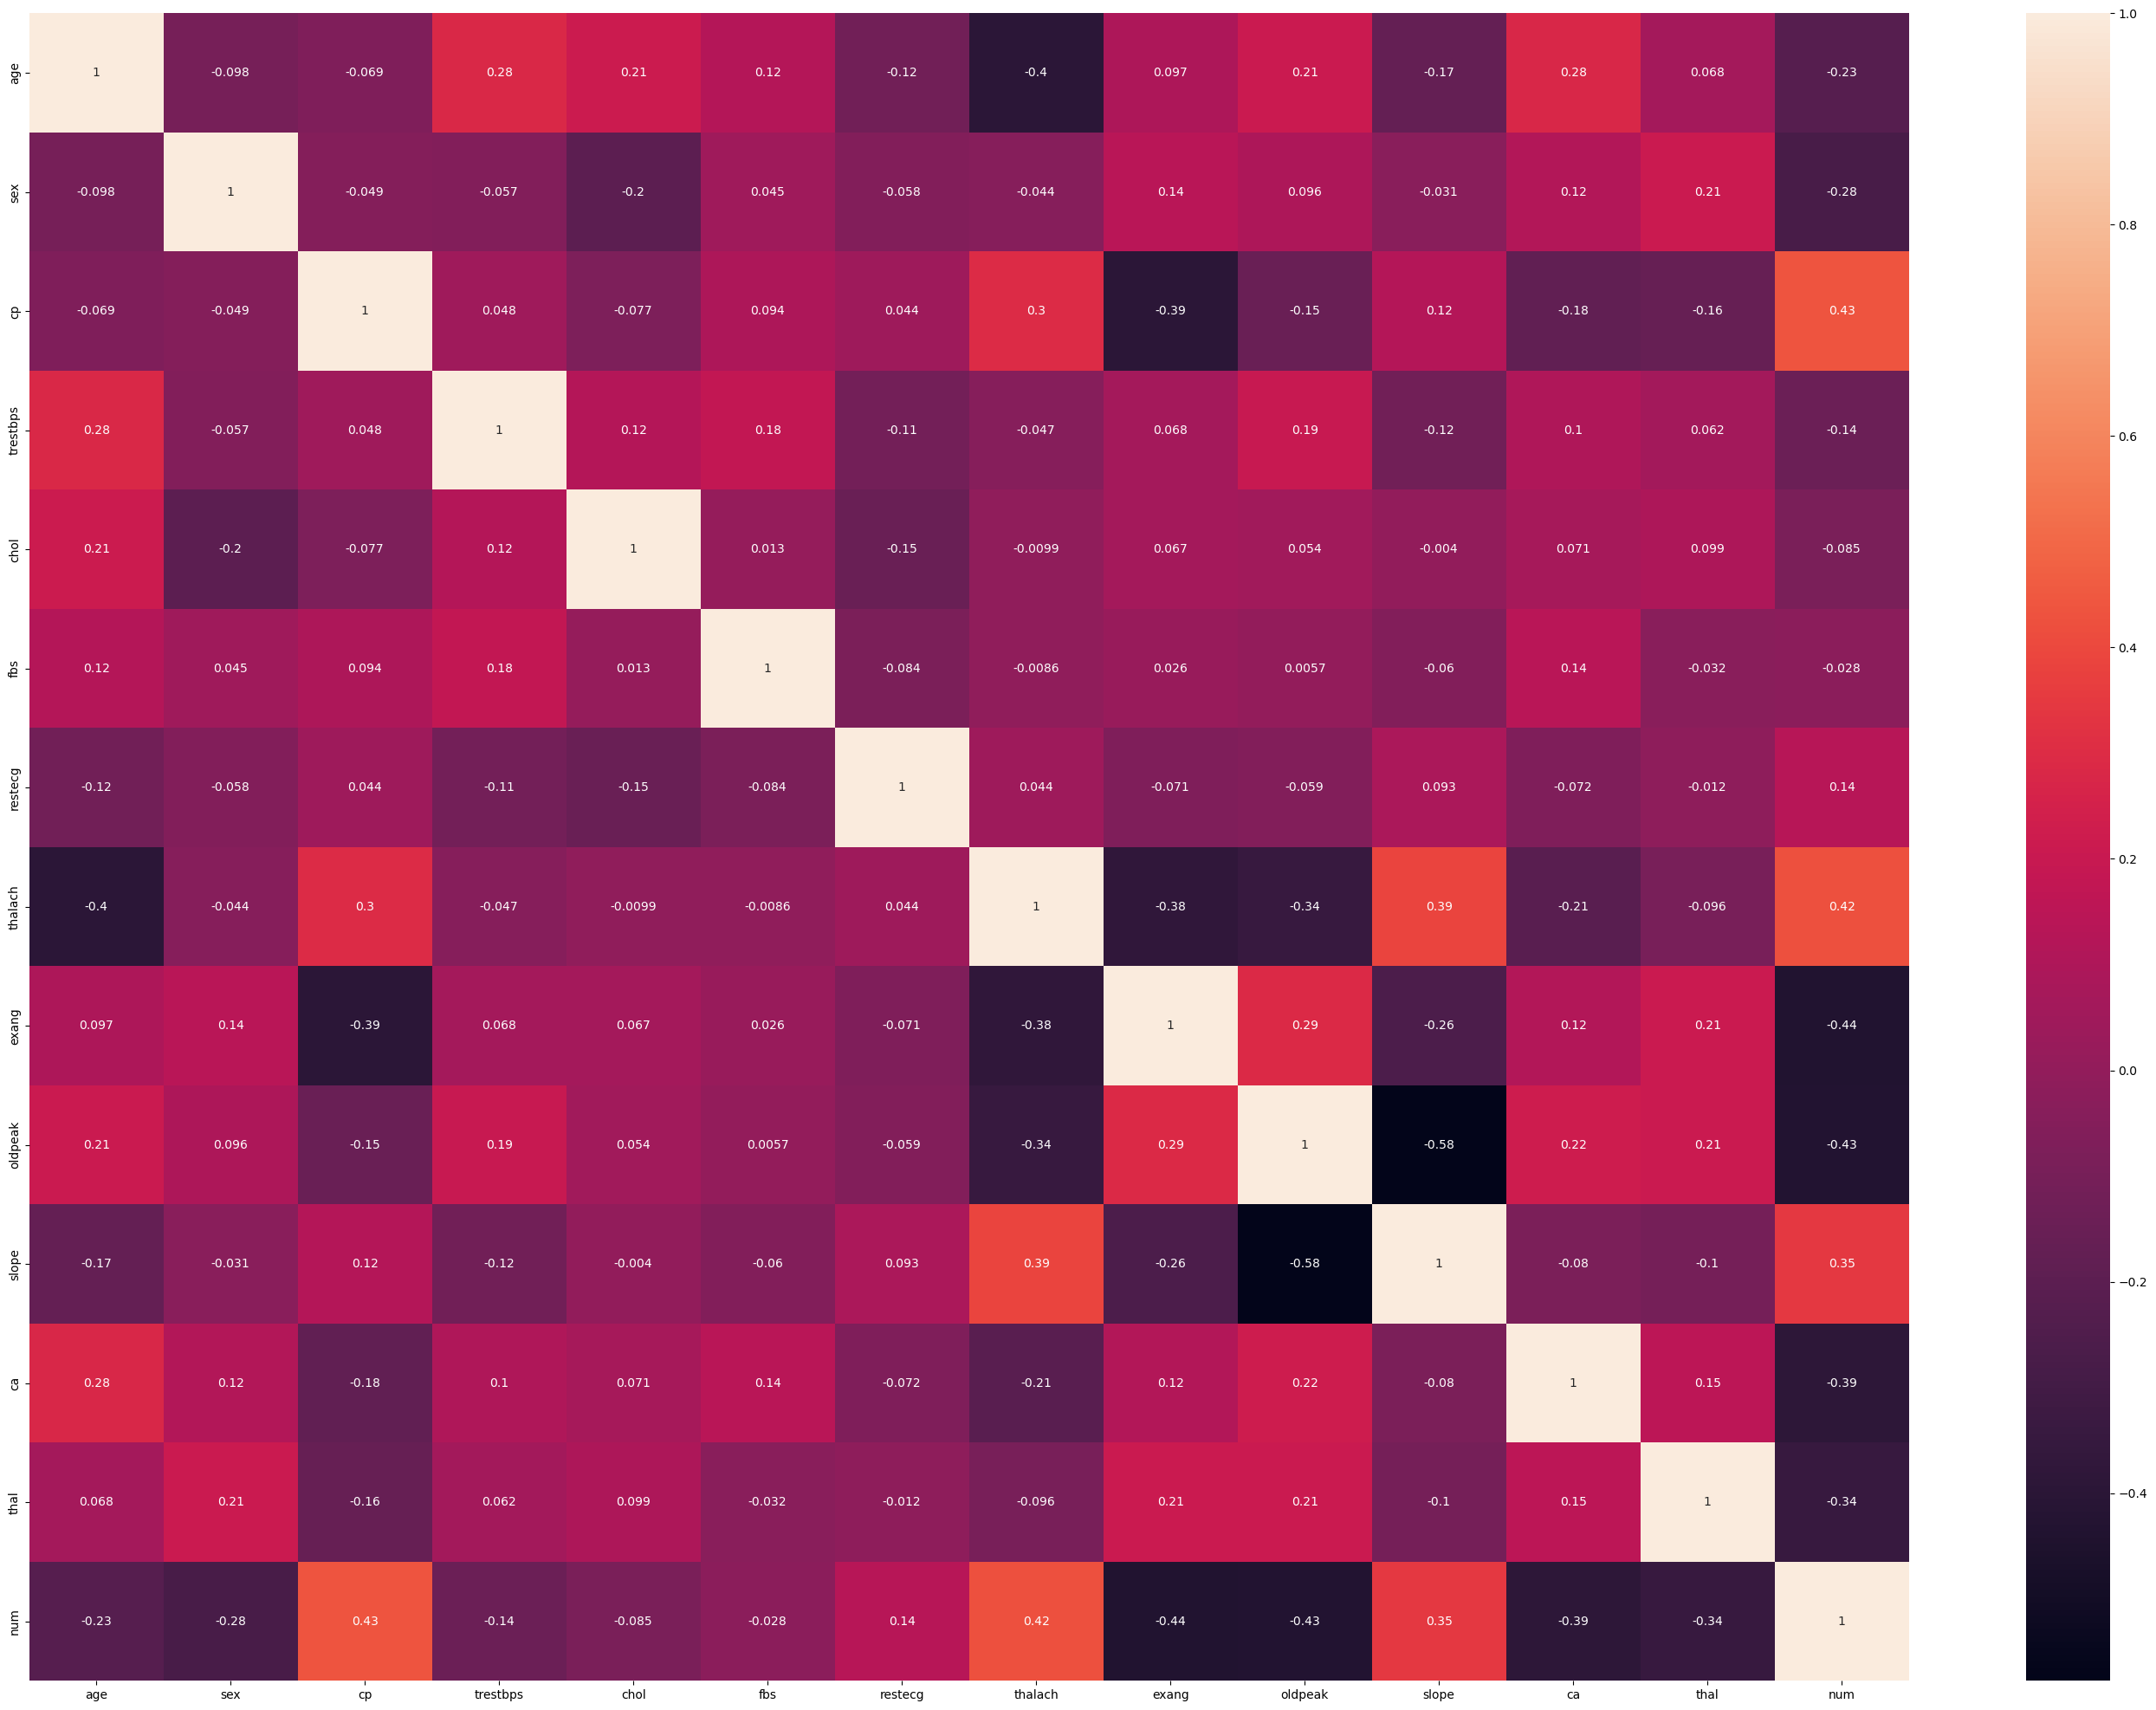

In [127]:
#Correlation between all the variables
plot.figure(figsize=(35, 25))
sns.heatmap(data.corr(), annot=True)


<Axes: >

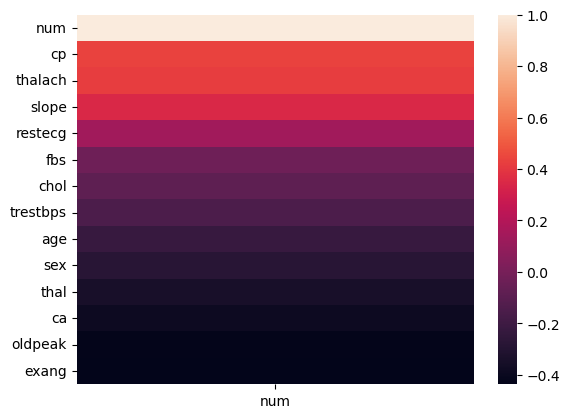

In [128]:
#colinearity with the target

sns.heatmap(data.corr()[['num']].sort_values(by='num', ascending=False))


<Axes: xlabel='num', ylabel='count'>

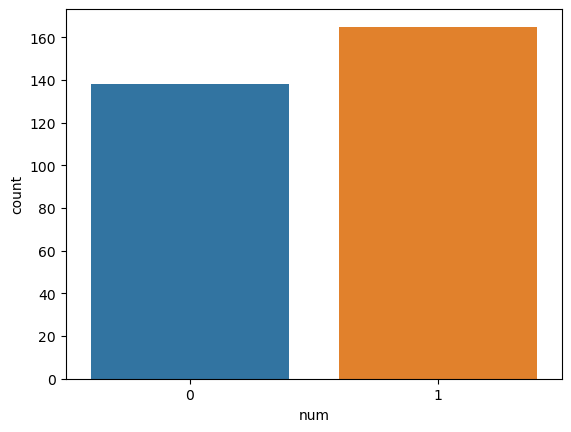

In [129]:
#balanced data

sns.countplot(data=data, x="num")

# towards normalization

In [130]:
data.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [131]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [132]:
#to get all the categorical 
columns=data.columns
total_columns=len(columns)
for i in range(0,total_columns, 1):
    print(columns[i])
    print(data[columns[i]].unique())


age
[63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex
[1 0]
cp
[3 2 1 0]
trestbps
[145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol
[233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs
[1 0]
reste

# get dummies

In [133]:
a = pd.get_dummies(data['cp'], prefix = "cp")
b = pd.get_dummies(data['thal'], prefix = "thal")
c = pd.get_dummies(data['slope'], prefix = "slope")
d=  pd.get_dummies(data['ca'], prefix = "ca")
e=  pd.get_dummies(data['restecg'], prefix = "restecg")

In [134]:
frames = [data, a, b, c,d,e]
data = pd.concat(frames, axis = 1)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,restecg_0,restecg_1,restecg_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,0,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,0,1,0,0,0,0,0,1,0
2,41,0,1,130,204,0,0,172,0,1.4,...,0,1,1,0,0,0,0,1,0,0
3,56,1,1,120,236,0,1,178,0,0.8,...,0,1,1,0,0,0,0,0,1,0
4,57,0,0,120,354,0,1,163,1,0.6,...,0,1,1,0,0,0,0,0,1,0


In [135]:
data = data.drop(columns = ['cp', 'thal', 'slope', 'ca', 'restecg'])
data.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,num,cp_0,...,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,restecg_0,restecg_1,restecg_2
0,63,1,145,233,1,150,0,2.3,1,0,...,0,0,1,0,0,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,1,0,...,0,0,1,0,0,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,1,0,...,0,1,1,0,0,0,0,1,0,0
3,56,1,120,236,0,178,0,0.8,1,0,...,0,1,1,0,0,0,0,0,1,0
4,57,0,120,354,0,163,1,0.6,1,1,...,0,1,1,0,0,0,0,0,1,0


# SCALING

In [136]:
y = data.loc[:, data.columns == 'num']
y= pd.DataFrame(y, columns=['num'])
y

,num
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


In [137]:
#x_data = data.iloc[: , :-1]
x_data = data.loc[:, data.columns != 'num']
x_data.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'cp_0', 'cp_1', 'cp_2', 'cp_3', 'thal_0', 'thal_1', 'thal_2', 'thal_3',
       'slope_0', 'slope_1', 'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4',
       'restecg_0', 'restecg_1', 'restecg_2'],
      dtype='object')

In [138]:
# Normalize
from sklearn import preprocessing




scaler = preprocessing.MinMaxScaler()
x_data1 = scaler.fit_transform(x_data)
scaled_df = pd.DataFrame(x_data1, columns=(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'cp_0', 'cp_1', 'cp_2', 'cp_3', 'thal_0', 'thal_1', 'thal_2', 'thal_3',
       'slope_0', 'slope_1', 'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4',
       'restecg_0', 'restecg_1', 'restecg_2']))
print(scaled_df)

          age  sex  trestbps      chol  fbs   thalach  exang   oldpeak  cp_0  \
0    0.708333  1.0  0.481132  0.244292  1.0  0.603053    0.0  0.370968   0.0   
1    0.166667  1.0  0.339623  0.283105  0.0  0.885496    0.0  0.564516   0.0   
2    0.250000  0.0  0.339623  0.178082  0.0  0.770992    0.0  0.225806   0.0   
3    0.562500  1.0  0.245283  0.251142  0.0  0.816794    0.0  0.129032   0.0   
4    0.583333  0.0  0.245283  0.520548  0.0  0.702290    1.0  0.096774   1.0   
..        ...  ...       ...       ...  ...       ...    ...       ...   ...   
298  0.583333  0.0  0.433962  0.262557  0.0  0.396947    1.0  0.032258   1.0   
299  0.333333  1.0  0.150943  0.315068  0.0  0.465649    0.0  0.193548   0.0   
300  0.812500  1.0  0.471698  0.152968  1.0  0.534351    0.0  0.548387   1.0   
301  0.583333  1.0  0.339623  0.011416  0.0  0.335878    1.0  0.193548   1.0   
302  0.583333  0.0  0.339623  0.251142  0.0  0.786260    0.0  0.000000   0.0   

     cp_1  ...  slope_1  slope_2  ca_0 

In [139]:
scaled_df

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,cp_0,cp_1,...,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,restecg_0,restecg_1,restecg_2
0,0.708333,1.0,0.481132,0.244292,1.0,0.603053,0.0,0.370968,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.166667,1.0,0.339623,0.283105,0.0,0.885496,0.0,0.564516,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.250000,0.0,0.339623,0.178082,0.0,0.770992,0.0,0.225806,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.562500,1.0,0.245283,0.251142,0.0,0.816794,0.0,0.129032,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.583333,0.0,0.245283,0.520548,0.0,0.702290,1.0,0.096774,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.0,0.433962,0.262557,0.0,0.396947,1.0,0.032258,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
299,0.333333,1.0,0.150943,0.315068,0.0,0.465649,0.0,0.193548,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
300,0.812500,1.0,0.471698,0.152968,1.0,0.534351,0.0,0.548387,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
301,0.583333,1.0,0.339623,0.011416,0.0,0.335878,1.0,0.193548,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# split

In [140]:
x_train, x_test, y_train, y_test = train_test_split(scaled_df,y,test_size = 0.2)
#x_train, x_test, y_train, y_test = train_test_split(x_data,y1,test_size = 0.2,random_state=0)
#x_train.shape (242, 27)
#y_train.shape (242, 1)
#x_test.shape (61, 27)
#y_test.shape (61, 1)

# k fold cross validation

In [141]:
#Decision Tree
clf = DecisionTreeClassifier()
k_folds = KFold(n_splits = 5)
scores = cross_val_score(clf, x_train, y_train, cv = k_folds)
print("For Decision Tree")
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print('\n')

#knn

print("For KNN")
clf = KNeighborsClassifier()
k_folds = KFold(n_splits = 5)
scores = cross_val_score(clf, x_train, y_train, cv = k_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print('\n')

#naive bayes
print("For Naive Bayes")
clf = GaussianNB()
k_folds = KFold(n_splits = 5)
scores = cross_val_score(clf, x_train, y_train, cv = k_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print('\n')



For Decision Tree
Cross Validation Scores:  [0.71428571 0.73469388 0.66666667 0.6875     0.64583333]
Average CV Score:  0.689795918367347


For KNN


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Cross Validation Scores:  [0.81632653 0.81632653 0.79166667 0.875      0.79166667]
Average CV Score:  0.8181972789115646


For Naive Bayes
Cross Validation Scores:  [0.89795918 0.65306122 0.72916667 0.75       0.83333333]
Average CV Score:  0.772704081632653




C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, )

# KNN

In [142]:
error_rate = []

for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    error_rate.append(pred.mean())
    
#error_rate

#plt.figure(figsize=(15,10))
#plt.plot(error_rate, marker='o', markersize=9)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

In [143]:
# KNN Model

knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(x_train, y_train)
knn.score(x_test, y_test)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.819672131147541

In [144]:

dt = DecisionTreeClassifier(criterion= 'entropy')
dt.fit(x_train, y_train)
dt.score(x_test, y_test)




0.8032786885245902

In [145]:

nb = GaussianNB()
nb.fit(x_train, y_train)
nb.score(x_test,y_test)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9016393442622951

# confusion matrix

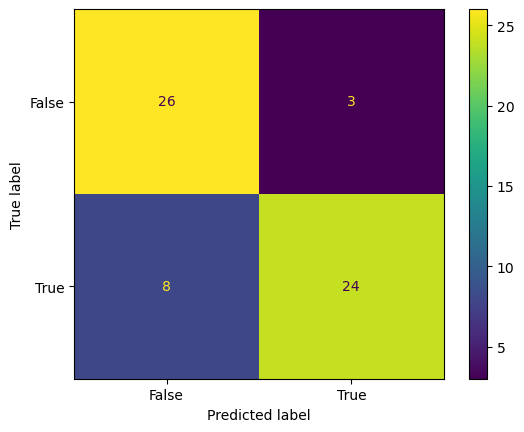

In [146]:
#knn
from sklearn import metrics

knn_actual=y_test
knn_predicted=knn.predict(x_test)
confusion_matrix = metrics.confusion_matrix(knn_actual, knn_predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

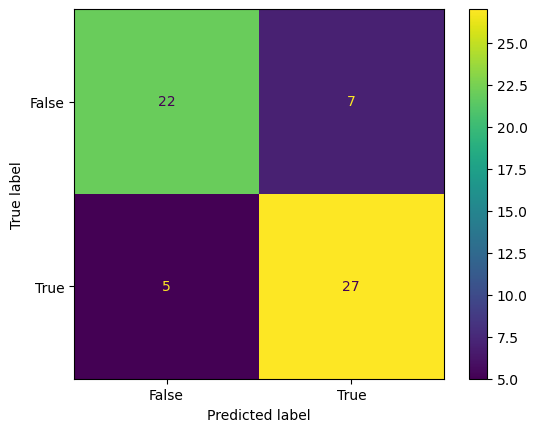

In [147]:
#knn
from sklearn import metrics

dt_actual=y_test
dt_predicted=dt.predict(x_test)
confusion_matrix = metrics.confusion_matrix(dt_actual, dt_predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

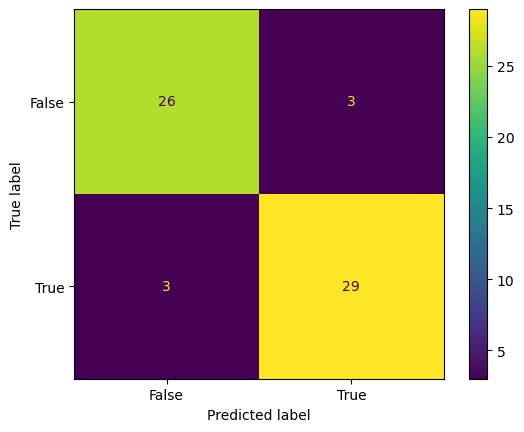

In [148]:
#knn
from sklearn import metrics

nb_actual=y_test
nb_predicted=nb.predict(x_test)
confusion_matrix = metrics.confusion_matrix(nb_actual, nb_predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

# Comparing the three models

In [149]:
knn_score=knn.score(x_test, y_test)
dt_score=dt.score(x_test, y_test)
nb_score=nb.score(x_test, y_test)

models = pd.DataFrame({
    'Model' : ['K Neighbors', 'Decision Tree','Naive Bayes'],
    'Score' : [knn_score, dt_score, nb_score]
})
models

,Model,Score
0,K Neighbors,0.819672
1,Decision Tree,0.803279
2,Naive Bayes,0.901639


KNN is the better among the three here.